In [4]:
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score
import pandas as pd
import numpy as np


def find_str(text, start_delim, end_delim):
    try:
        start_index = text.find(start_delim) + len(start_delim)
        end_index = text.find(end_delim, start_index)
        if start_index < len(start_delim) or end_index == -1:
            return None  
        return text[start_index:end_index]
    except:
        return None

In [5]:
data = pd.read_csv('merge_22075_with_all_model.csv')
MCFEND = pd.read_csv('MCFEND_for_classification.csv')


In [7]:
#ALL
Q_names = 'content_quality_finally'
quality_order = ['poor', 'average', 'good']
models = ['GPT4', 'Gemini_2.0_exp', 'llama-3.3-70b-versatile', 'GLM_4_Flash', 'QWen2.5_72B', 'DeepSeek-V3', 'Grok3', 'Claude-3.7-sonnet']

# data = MCFEND

llms_pre = []
for model in models:
    y_true_ai = np.array(data['MY_AI'])
    y_true_fk = np.array(data['MY_FK'])
    y_pre_ai = np.array(data[model].apply(lambda x: find_str(x,'[',',')).astype(float))
    y_pre_fk = np.array(data[model].apply(lambda x: find_str(x,',',']')).astype(float))

    a = accuracy_score (y_true_ai, y_pre_ai)
    b = precision_score(y_true_ai, y_pre_ai, pos_label=1)
    c = recall_score(y_true_ai, y_pre_ai, pos_label=1)
    d = f1_score(y_true_ai, y_pre_ai, pos_label=1)

    a_ = accuracy_score (y_true_fk, y_pre_fk)
    b_ = precision_score(y_true_fk, y_pre_fk, pos_label=1)
    c_ = recall_score(y_true_fk, y_pre_fk, pos_label=1)
    d_ = f1_score(y_true_fk, y_pre_fk, pos_label=1)
    llms_pre.append([model,round(a*100,2),round(c*100,2),round(b*100,2),round(d*100,2),
                           round(a_*100,2),round(c_*100,2),round(b_*100,2),round(d_*100,2)])
pd.DataFrame(llms_pre,columns=['model','acc_AI','re_AI','pre_AI','wF1_AI','acc_FK','re_FK','pre_FK','wF1_FK']).to_csv('llms_pre/all_llms_pre_toutiao.csv',index=None)
#pd.DataFrame(llms_pre,columns=['model','acc_AI','re_AI','pre_AI','wF1_AI','acc_FK','re_FK','pre_FK','wF1_FK']).to_csv('llms_pre/all_llms_pre_mcfend.csv',index=None)

In [8]:
#
data = pd.read_csv('merge_22075_with_all_model.csv')

Q_names = 'content_quality_finally'
quality_order = ['poor', 'average', 'good']
models = ['GPT4', 'Gemini_2.0_exp', 'llama-3.3-70b-versatile', 'GLM_4_Flash', 'QWen2.5_72B', 'DeepSeek-V3', 'Grok3', 'Claude-3.7-sonnet']


#MCFEND = pd.read_csv('MCFEND_for_classification.csv')
# data = MCFEND
# Q_names = 'content_quality_finally'

for Q in quality_order:
    llms_pre = []
    for model in models:
        y_true_ai = np.array(data[data[Q_names] == Q]['MY_AI'])
        y_true_fk = np.array(data[data[Q_names] == Q]['MY_FK'])
        y_pre_ai = np.array(data[data[Q_names] == Q][model].apply(lambda x: find_str(x,'[',',')).astype(float))
        y_pre_fk = np.array(data[data[Q_names] == Q][model].apply(lambda x: find_str(x,',',']')).astype(float))

        a = accuracy_score (y_true_ai, y_pre_ai)
        b = precision_score(y_true_ai, y_pre_ai, pos_label=1)
        c = recall_score(y_true_ai, y_pre_ai, pos_label=1)
        d = f1_score(y_true_ai, y_pre_ai, pos_label=1)

        a_ = accuracy_score (y_true_fk, y_pre_fk)
        b_ = precision_score(y_true_fk, y_pre_fk, pos_label=1)
        c_ = recall_score(y_true_fk, y_pre_fk, pos_label=1)
        d_ = f1_score(y_true_fk, y_pre_fk, pos_label=1)
        llms_pre.append([model,round(a*100,2),round(c*100,2),round(b*100,2),round(d*100,2),
                               round(a_*100,2),round(c_*100,2),round(b_*100,2),round(d_*100,2)])
    #pd.DataFrame(llms_pre,columns=['model','acc_AI','re_AI','pre_AI','wF1_AI','acc_FK','re_FK','pre_FK','wF1_FK']).to_csv('llms_pre/'+Q+'_llms_pre_toutiao.csv',index=None)
    pd.DataFrame(llms_pre,columns=['model','acc_AI','re_AI','pre_AI','wF1_AI','acc_FK','re_FK','pre_FK','wF1_FK']).to_csv('llms_pre/'+Q+'_llms_pre_mcfend.csv',index=None)

In [ ]:
data = pd.read_csv('merge_22075_with_all_model.csv')
MCFEND = pd.read_csv('MCFEND_for_classification.csv')


In [ ]:

data = MCFEND
Q_names = 'content_quality_finally'
data['AI_FK'] = 0
yes_list = data[(data['MY_AI'] == 1)&(data['MY_FK'] == 1)].index.to_list()
no_list = data[(data['MY_AI'] == 0)|(data['MY_FK'] == 0)].index.to_list()
data.loc[yes_list,['AI_FK']]=1
data.loc[no_list,['AI_FK']]=0


In [ ]:
#AIFK—group
Q_names = 'content_quality_finally'

quality_order = ['poor', 'average', 'good']
models = [ 'GLM_4_Flash', 'Claude-3.7-sonnet','GPT4', 'Gemini_2.0_exp', 'llama-3.3-70b-versatile', 'QWen2.5_72B', 'DeepSeek-V3', 'Grok3']


for Q in quality_order:
    llms_pre = []
    for model in models:
        y_true = np.array(data[data[Q_names] == Q]['AI_FK'])
        y_pre = np.array(data[data[Q_names] == Q][model].apply(lambda x: 1 if x == '[1,1]' else 0))

        a = accuracy_score (y_true, y_pre)
        c = recall_score(y_true, y_pre, pos_label=1)
        b = precision_score(y_true, y_pre, pos_label=1)
        d = f1_score(y_true, y_pre, pos_label=1)
        llms_pre.append([model,round(a*100,2),round(c*100,2),round(b*100,2),round(d*100,2)])
    #pd.DataFrame(llms_pre,columns=['model','acc','re','pre','wF1']).to_csv('llms_pre/'+Q+'_llms_pre2_toutiao.csv',index=None)
    pd.DataFrame(llms_pre,columns=['model','acc','pre','re','wF1']).to_csv('llms_pre/'+Q+'_llms_pre2_mcfend.csv',index=None)
    
    
#AIFK—all

models = [ 'GLM_4_Flash', 'Claude-3.7-sonnet','GPT4', 'Gemini_2.0_exp', 'llama-3.3-70b-versatile', 'QWen2.5_72B', 'DeepSeek-V3', 'Grok3']


llms_pre = []
for model in models:
    y_true = np.array(data['AI_FK'])
    y_pre = np.array(data[model].apply(lambda x: 1 if x == '[1,1]' else 0))

    a = accuracy_score (y_true, y_pre)
    c = recall_score(y_true, y_pre, pos_label=1)
    b = precision_score(y_true, y_pre, pos_label=1)
    d = f1_score(y_true, y_pre, pos_label=1)
    llms_pre.append([model,round(a*100,2),round(c*100,2),round(b*100,2),round(d*100,2)])
#pd.DataFrame(llms_pre,columns=['model','acc','re','pre','wF1']).to_csv('llms_pre/all_aifk_llms_pre_toutiao.csv',index=None)
pd.DataFrame(llms_pre,columns=['model','acc','pre','re','wF1']).to_csv('llms_pre/all_aifk_llms_pre_mcfend.csv',index=None)

# Fig. 12.  Recognition results of all models. (a) to (b) are the recognition results of the model for Toutiao, and (d) to (f) are the results for MCFEND.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


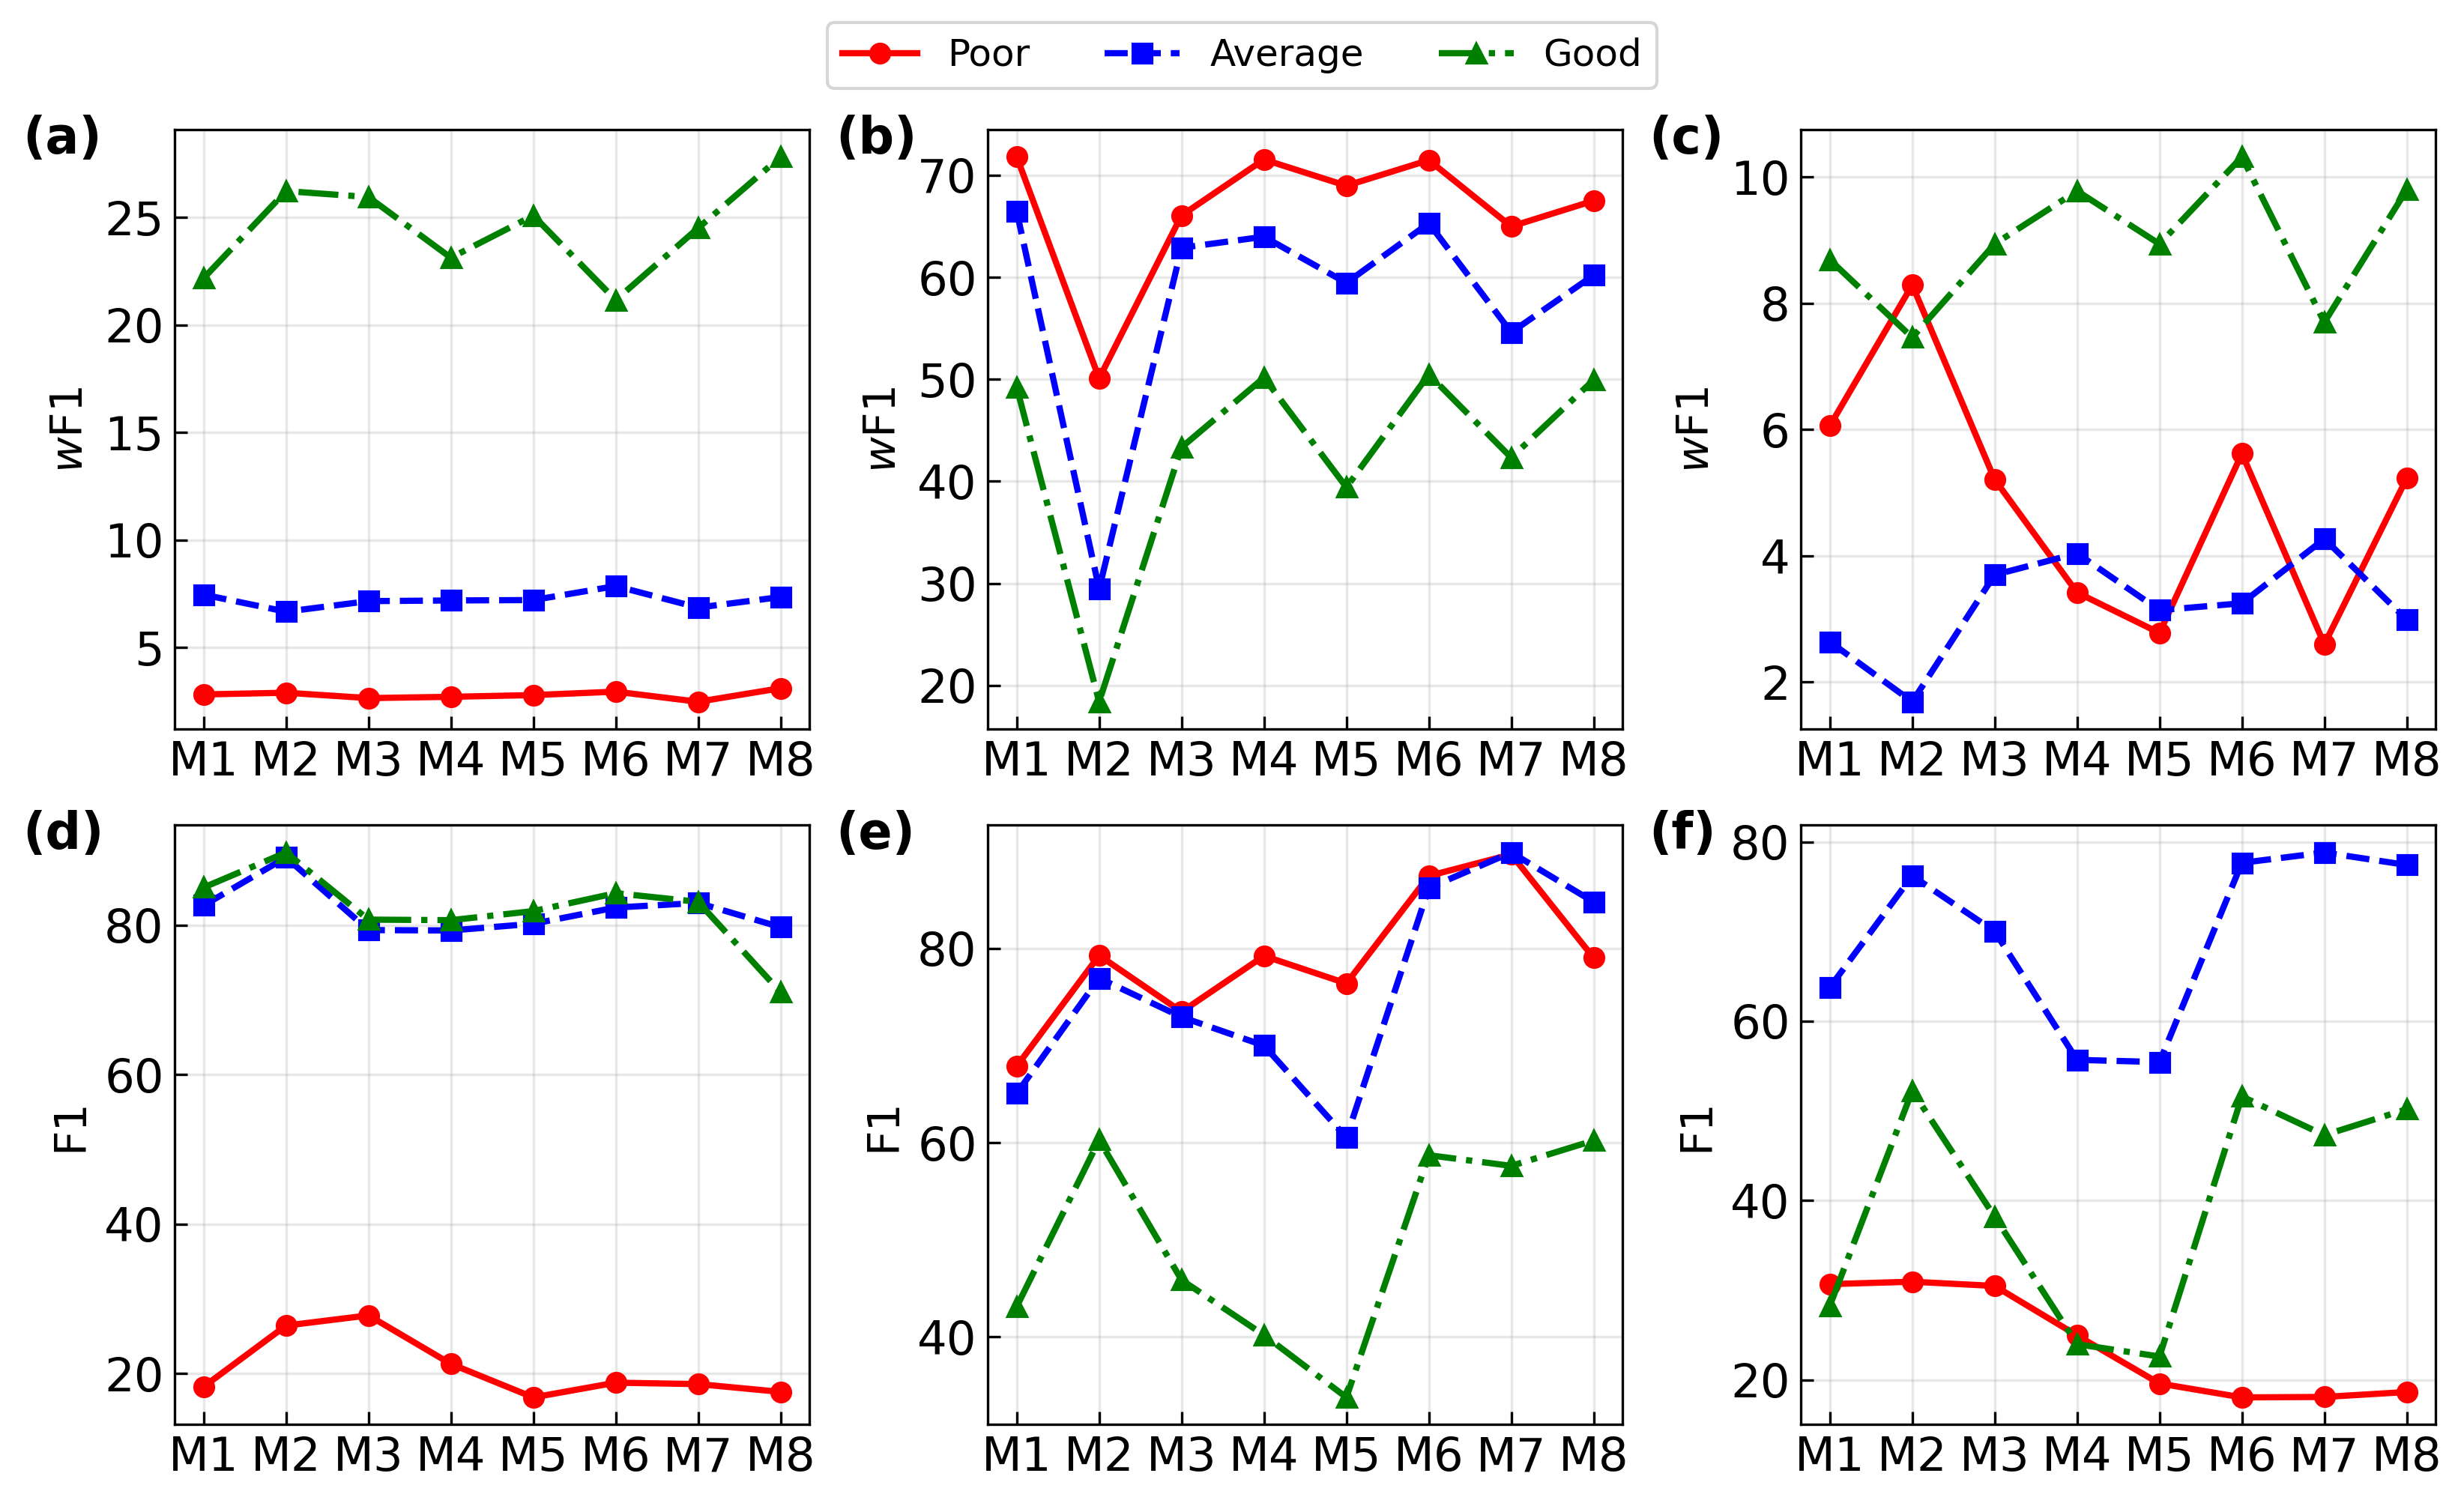

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'

y_lable_size = 14
x_lable_size = 12
x_tick_size = 15
y_tick_size = 15

x = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8']

wF1_AI_poor_1 = [2.82, 2.9, 2.65, 2.71, 2.79, 2.95, 2.48, 3.11]
wF1_AI_average_1 = [7.46, 6.67, 7.16, 7.19, 7.21, 7.86, 6.86, 7.35]
wF1_AI_good_1 = [22.18, 26.23, 25.95, 23.13, 25.09, 21.16, 24.51, 27.82]
wF1_FK_poor_1 = [71.8, 50.09, 66.06, 71.54, 68.97, 71.48, 64.98, 67.5]
wF1_FK_average_1 = [66.45, 29.45, 62.89, 63.97, 59.45, 65.3, 54.6, 60.2]
wF1_FK_good_1 = [49.21, 18.39, 43.33, 50.16, 39.41, 50.47, 42.32, 49.93]

wF1_AIFK_poor_1 = [6.06, 8.29, 5.21, 3.42, 2.78, 5.62, 2.6, 5.23]
wF1_AIFK_average_1 = [2.64, 1.69, 3.7, 4.04, 3.14, 3.25, 4.27, 2.99]
wF1_AIFK_good_1 = [8.69, 7.46, 8.94, 9.78, 8.94, 10.32, 7.7, 9.8]

wF1_AI_poor_2 = [18.24, 26.42, 27.78, 21.29, 16.81, 18.78, 18.59, 17.55]
wF1_AI_average_2 = [82.63, 89.05, 79.33, 79.28, 80.18, 82.35, 82.96, 79.72]
wF1_AI_good_2 = [85.03, 89.71, 80.73, 80.66, 81.87, 84.27, 83.11, 71.02]
wF1_FK_poor_2 = [67.88, 79.28, 73.48, 79.23, 76.4, 87.47, 89.69, 79.03]
wF1_FK_average_2 = [65.08, 76.94, 72.94, 70, 60.52, 86.23, 89.88, 84.79]
wF1_FK_good_2 =[43.12, 60.28, 45.86, 40.19, 33.77, 58.71, 57.61, 60.22]

wF1_AIFK_poor_2 =[30.68, 30.95, 30.48, 24.96, 19.6, 18.05, 18.1, 18.65]
wF1_AIFK_average_2 = [63.77, 76.21, 70.01, 55.69, 55.44, 77.66, 78.81, 77.42]
wF1_AIFK_good_2 = [28.27, 52.23, 38.2, 23.98, 22.61, 51.61, 47.29, 50.19]

fig, axes = plt.subplots(2, 3, figsize=(11, 7), dpi=300)

styles = {
    'poor': {'linestyle': '-', 'marker': 'o', 'color': 'red', 'linewidth': 2, 'markersize': 6},
    'average': {'linestyle': '--', 'marker': 's', 'color': 'blue', 'linewidth': 2, 'markersize': 6},
    'good': {'linestyle': '-.', 'marker': '^', 'color': 'green', 'linewidth': 2, 'markersize': 6}
}

axes[0, 0].plot(x, wF1_AI_poor_1, label='Poor', **styles['poor'])
axes[0, 0].plot(x, wF1_AI_average_1, label='Average', **styles['average'])
axes[0, 0].plot(x, wF1_AI_good_1, label='Good', **styles['good'])
axes[0, 0].set_ylabel('$\mathit{w}$F1', fontsize=y_lable_size)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='both', rotation=0, labelsize=x_tick_size)
axes[0, 0].tick_params(colors='black')
axes[0, 0].tick_params(which='both', direction='in', length=4)

axes[0, 1].plot(x, wF1_FK_poor_1, label='Poor', **styles['poor'])
axes[0, 1].plot(x, wF1_FK_average_1, label='Average', **styles['average'])
axes[0, 1].plot(x, wF1_FK_good_1, label='Good', **styles['good'])
axes[0, 1].set_ylabel('$\mathit{w}$F1', fontsize=y_lable_size)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='both', rotation=0, labelsize=x_tick_size)
axes[0, 1].tick_params(colors='black')
axes[0, 1].tick_params(which='both', direction='in', length=4)

axes[0, 2].plot(x, wF1_AIFK_poor_1, label='Poor', **styles['poor'])
axes[0, 2].plot(x, wF1_AIFK_average_1, label='Average', **styles['average'])
axes[0, 2].plot(x, wF1_AIFK_good_1, label='Good', **styles['good'])
axes[0, 2].set_ylabel('$\mathit{w}$F1', fontsize=y_lable_size)
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].tick_params(axis='both', rotation=0, labelsize=x_tick_size)
axes[0, 2].tick_params(colors='black')
axes[0, 2].tick_params(which='both', direction='in', length=4)

axes[1, 0].plot(x, wF1_AI_poor_2, label='Poor', **styles['poor'])
axes[1, 0].plot(x, wF1_AI_average_2, label='Average', **styles['average'])
axes[1, 0].plot(x, wF1_AI_good_2, label='Good', **styles['good'])
axes[1, 0].set_ylabel('F1', fontsize=y_lable_size)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='both', rotation=0, labelsize=x_tick_size)
axes[1, 0].tick_params(colors='black')
axes[1, 0].tick_params(which='both', direction='in', length=4)

axes[1, 1].plot(x, wF1_FK_poor_2, label='Poor', **styles['poor'])
axes[1, 1].plot(x, wF1_FK_average_2, label='Average', **styles['average'])
axes[1, 1].plot(x, wF1_FK_good_2, label='Good', **styles['good'])
axes[1, 1].set_ylabel('F1', fontsize=y_lable_size)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='both', rotation=0, labelsize=x_tick_size)
axes[1, 1].tick_params(colors='black')
axes[1, 1].tick_params(which='both', direction='in', length=4)

axes[1, 2].plot(x, wF1_AIFK_poor_2, label='Poor', **styles['poor'])
axes[1, 2].plot(x, wF1_AIFK_average_2, label='Average', **styles['average'])
axes[1, 2].plot(x, wF1_AIFK_good_2, label='Good', **styles['good'])
axes[1, 2].set_ylabel('F1', fontsize=y_lable_size)
axes[1, 2].grid(True, alpha=0.3)
axes[1, 2].tick_params(axis='both', rotation=0, labelsize=x_tick_size)
axes[1, 2].tick_params(colors='black')
axes[1, 2].tick_params(which='both', direction='in', length=4)

axes[0, 0].text(-0.24, 0.96, '(a)', transform=axes[0, 0].transAxes, fontsize=16, fontweight='bold')
axes[0, 1].text(-0.24, 0.96, '(b)', transform=axes[0, 1].transAxes, fontsize=16, fontweight='bold')
axes[0, 2].text(-0.24, 0.96, '(c)', transform=axes[0, 2].transAxes, fontsize=16, fontweight='bold')
axes[1, 0].text(-0.24, 0.96, '(d)', transform=axes[1, 0].transAxes, fontsize=16, fontweight='bold')
axes[1, 1].text(-0.24, 0.96, '(e)', transform=axes[1, 1].transAxes, fontsize=16, fontweight='bold')
axes[1, 2].text(-0.24, 0.96, '(f)', transform=axes[1, 2].transAxes, fontsize=16, fontweight='bold')

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.96), 
           ncol=3, fontsize=12)

plt.tight_layout()
plt.subplots_adjust(top=0.88)

# plt.savefig("fig/llm_pre_ai_fk_aifk_2x3.jpg", dpi=300)
# plt.savefig("fig/llm_pre_ai_fk_aifk_2x3.svg", dpi=300)
plt.savefig("fig/llm_pre_ai_fk_aifk_2x3.eps", dpi=300)
# plt.savefig("fig/llm_pre_ai_fk_aifk_2x3.pdf", dpi=300)

plt.show()


# Fig. 13.  CDF curves of DD for correctly and incorrectly classified AI_FK on different quality groups. (a) and (b) represent the CDF on Toutiao and MCFEND, respectively.

In [10]:
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import pickle

all_quality_common_errors = pickle.load(open('all_quality_common_errors.pkl','rb'))
all_quality_common_errors_M = pickle.load(open('all_quality_common_errors_M.pkl','rb'))

all_quality_common_correct = pickle.load(open('all_quality_common_correct.pkl','rb'))
all_quality_common_correct_M = pickle.load(open('all_quality_common_correct_M.pkl','rb'))

In [11]:
hanlp_MCFNED_lists = pd.read_csv('hanlp_MCFEND_lists.csv')
hanlp_data_lists = pd.read_csv('hanlp_data_lists.csv')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


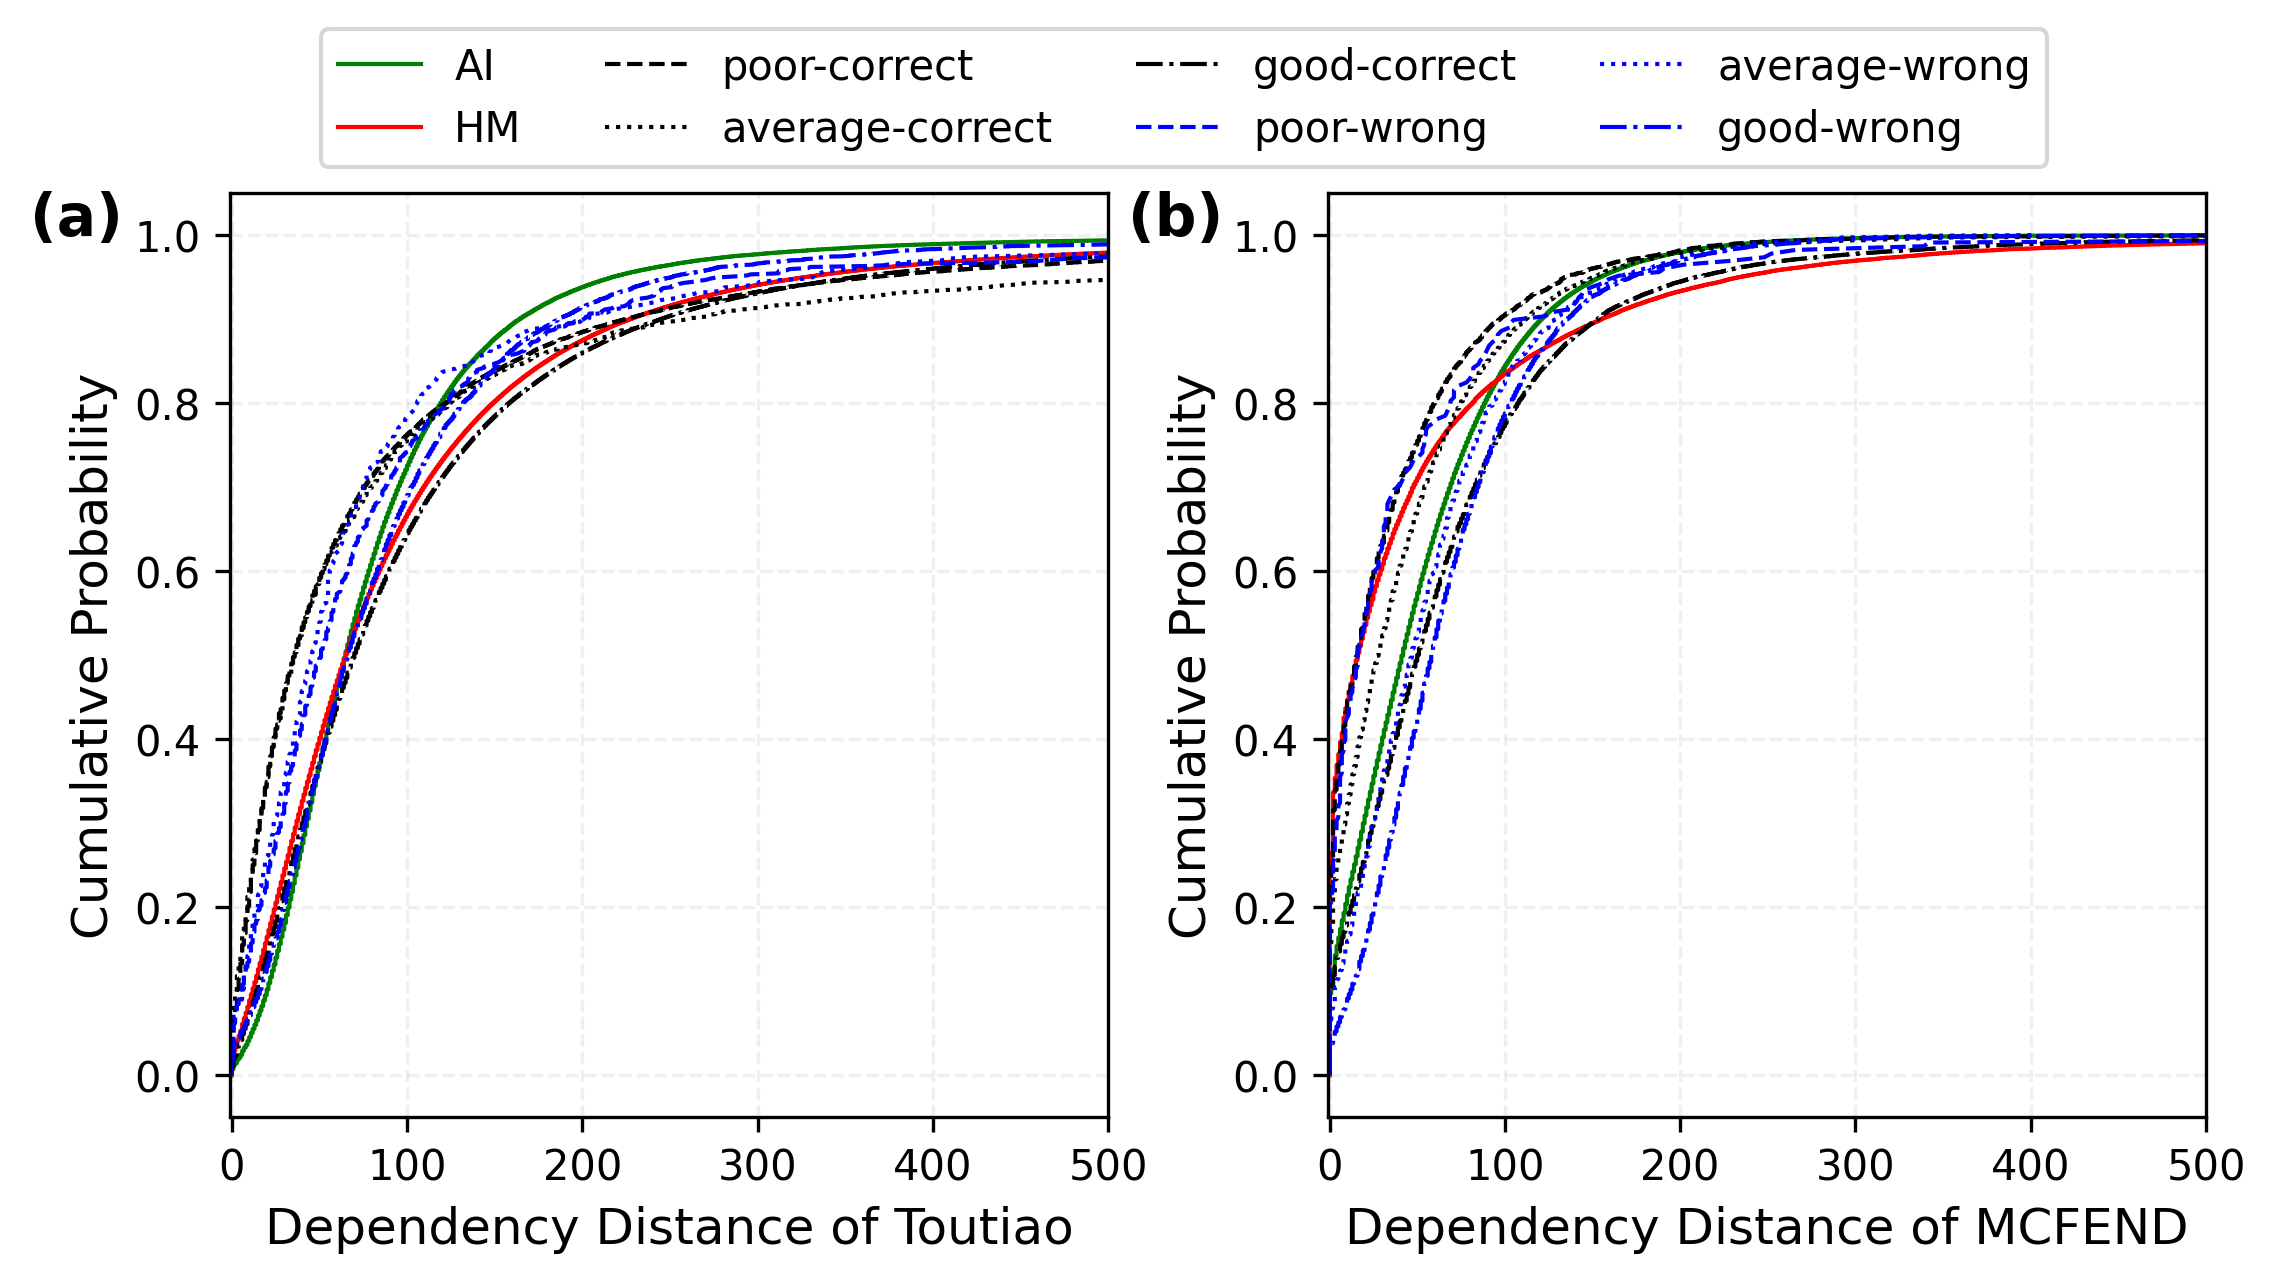

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

def get_all_num(data):
    a = data['dep_DD'].apply(ast.literal_eval)
    all_numbers = [num for sublist in a for num in sublist]
    return all_numbers

fig, axes = plt.subplots(1, 2, figsize=(8.5, 4), dpi=300)

sorted_data = np.sort(np.array(get_all_num(hanlp_data_lists[hanlp_data_lists['MY_AI']==1])))
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[0].plot(sorted_data, cdf, label='AI', color='green', lw=1)

sorted_data = np.sort(np.array(get_all_num(hanlp_data_lists[hanlp_data_lists['MY_AI']==0])))
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[0].plot(sorted_data, cdf, label='HM', color='red', lw=1)

sorted_data = np.sort(np.array(get_all_num(hanlp_data_lists.loc[all_quality_common_correct[0],:])))
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[0].plot(sorted_data, cdf, label='poor-correct', linestyle='--', color='k', lw=1)

sorted_data = np.sort(np.array(get_all_num(hanlp_data_lists.loc[all_quality_common_correct[1],:])))
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[0].plot(sorted_data, cdf, label='average-correct', linestyle=':', color='k', lw=1)

sorted_data = np.sort(np.array(get_all_num(hanlp_data_lists.loc[all_quality_common_correct[2],:])))
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[0].plot(sorted_data, cdf, label='good-correct', linestyle='-.', color='k', lw=1)

sorted_data = np.sort(np.array(get_all_num(hanlp_data_lists.loc[all_quality_common_errors[0],:])))
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[0].plot(sorted_data, cdf, label='poor-wrong', linestyle='--', color='b', lw=1)

sorted_data = np.sort(np.array(get_all_num(hanlp_data_lists.loc[all_quality_common_errors[1],:])))
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[0].plot(sorted_data, cdf, label='average-wrong', linestyle=':', color='b', lw=1)

sorted_data = np.sort(np.array(get_all_num(hanlp_data_lists.loc[all_quality_common_errors[2],:])))
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[0].plot(sorted_data, cdf, label='good-wrong', linestyle='-.', color='b', lw=1)

axes[0].set_xlim([-1, 500])
axes[0].grid(alpha=0.2, linestyle='--')
axes[0].set_xlabel('Dependency Distance of Toutiao', fontsize=12)
axes[0].set_ylabel('Cumulative Probability', fontsize=12)

sorted_data = np.sort(np.array(get_all_num(hanlp_MCFNED_lists[hanlp_MCFNED_lists['MY_AI']==1])))
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1].plot(sorted_data, cdf, label='AI', color='green', lw=1)

sorted_data = np.sort(np.array(get_all_num(hanlp_MCFNED_lists[hanlp_MCFNED_lists['MY_AI']==0])))
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1].plot(sorted_data, cdf, label='HM', color='red', lw=1)

sorted_data = np.sort(np.array(get_all_num(hanlp_MCFNED_lists.loc[all_quality_common_correct_M[0],:])))
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1].plot(sorted_data, cdf, label='poor-correct', linestyle='--', color='k', lw=1)

sorted_data = np.sort(np.array(get_all_num(hanlp_MCFNED_lists.loc[all_quality_common_correct_M[1],:])))
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1].plot(sorted_data, cdf, label='average-correct', linestyle=':', color='k', lw=1)

sorted_data = np.sort(np.array(get_all_num(hanlp_MCFNED_lists.loc[all_quality_common_correct_M[2],:])))
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1].plot(sorted_data, cdf, label='good-correct', linestyle='-.', color='k', lw=1)

sorted_data = np.sort(np.array(get_all_num(hanlp_MCFNED_lists.loc[all_quality_common_errors_M[0],:])))
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1].plot(sorted_data, cdf, label='poor-wrong', linestyle='--', color='b', lw=1)

sorted_data = np.sort(np.array(get_all_num(hanlp_MCFNED_lists.loc[all_quality_common_errors_M[1],:])))
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1].plot(sorted_data, cdf, label='average-wrong', linestyle=':', color='b', lw=1)

sorted_data = np.sort(np.array(get_all_num(hanlp_MCFNED_lists.loc[all_quality_common_errors_M[2],:])))
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1].plot(sorted_data, cdf, label='good-wrong', linestyle='-.', color='b', lw=1)

axes[1].set_xlim([-1, 500])
axes[1].grid(alpha=0.2, linestyle='--')
axes[1].set_xlabel('Dependency Distance of MCFEND', fontsize=12)
axes[1].set_ylabel('Cumulative Probability', fontsize=12)

axes[0].legend(loc='upper left', ncol=4, bbox_to_anchor=(0.08, 1.20))

axes[0].text(-115, 1, '(a)', fontsize=14, fontweight='bold')
axes[1].text(-115, 1, '(b)', fontsize=14, fontweight='bold')

plt.subplots_adjust(wspace=0.25)

# plt.savefig("fig/DD_CDF_caw_New.jpg", dpi=300)
# plt.savefig("fig/DD_CDF_caw_New.svg", dpi=300)
plt.savefig("fig/DD_CDF_caw_New.eps", dpi=300)
plt.savefig("fig/DD_CDF_caw_New.pdf", dpi=300)
plt.show()


# Fig. 14.  Top 5 bigram POS sequences of correctly and incorrectly classified AI_FK across all quality groups. (a) to (f) are the results on Toutiao, and (a) to (c) correspond to correctly predicted AI_FK in low-, medium-, and high-quality groups respectively, while (d) to (f) are misclassified cases. (g) to (f) are the results on MCFEND, and the quality group ordering, prediction correct and error ranking are consistent with the above. The vertical axis data of all subgraphs is the average frequency of the group of data.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from matplotlib.ticker import FormatStrFormatter  # 用于格式化刻度标签
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

def get_pos_n_grams_new(data,what_lists,n = 2,topk = 5):
    linshi = []
    length  = len(data.loc[what_lists,:].index.to_list())
    for i in data.loc[what_lists,:]['pos'].index.to_list():
        linshi.extend(ast.literal_eval(data.loc[what_lists,:]['pos'][i]))
    pos_texts = [' '.join(pos) for pos in linshi]
    vectorizer = CountVectorizer(analyzer='word', 
                                ngram_range=(n, n),
                                token_pattern=r'\b\w+\b',
                                min_df=2)
    X = vectorizer.fit_transform(pos_texts)
    df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    top_features = df.sum().sort_values(ascending=False).head(topk)
    top_features.index = top_features.index.str.replace(' ','-')
    return top_features,length

###The plot file is too large. This part of the code depends on the HANLP dataset being created with all the requested data.
##The plot file is too large. This part of the code depends on the HANLP dataset being created with all the requested data.
##The plot file is too large. This part of the code depends on the HANLP dataset being created with all the requested data.
hanlp_data = pd.read_csv('hanlp_data.csv')
hanlp_data_MCFNED = pd.read_csv('hanlp_MCFEND.csv')





all_quality_common_errors = pickle.load(open('all_quality_common_errors.pkl','rb'))
all_quality_common_errors_M = pickle.load(open('all_quality_common_errors_M.pkl','rb'))

all_quality_common_correct = pickle.load(open('all_quality_common_correct.pkl','rb'))
all_quality_common_correct_M = pickle.load(open('all_quality_common_correct_M.pkl','rb'))

hanlp_data['AI_FK'] = 0
yes_list = hanlp_data[(hanlp_data['MY_AI'] == 1)&(hanlp_data['MY_FK'] == 1)].index.to_list()
no_list = hanlp_data[(hanlp_data['MY_AI'] == 0)|(hanlp_data['MY_FK'] == 0)].index.to_list()
hanlp_data.loc[yes_list,['AI_FK']]=1
hanlp_data.loc[no_list,['AI_FK']]=0
hanlp_data_MCFNED['AI_FK'] = 0
yes_list = hanlp_data_MCFNED[(hanlp_data_MCFNED['MY_AI'] == 1)&(hanlp_data_MCFNED['MY_FK'] == 1)].index.to_list()
no_list = hanlp_data_MCFNED[(hanlp_data_MCFNED['MY_AI'] == 0)|(hanlp_data_MCFNED['MY_FK'] == 0)].index.to_list()
hanlp_data_MCFNED.loc[yes_list,['AI_FK']]=1
hanlp_data_MCFNED.loc[no_list,['AI_FK']]=0

data_poor_correct,length_poor_correct=get_pos_n_grams_new(hanlp_data,all_quality_common_correct[0])
data_average_correct,length_average_correct=get_pos_n_grams_new(hanlp_data,all_quality_common_correct[1])
data_good_correct,length_good_correct=get_pos_n_grams_new(hanlp_data,all_quality_common_correct[2])

data_poor_wrong,length_poor_wrong=get_pos_n_grams_new(hanlp_data,all_quality_common_errors[0])
data_average_wrong,length_average_wrong=get_pos_n_grams_new(hanlp_data,all_quality_common_errors[1])
data_good_wrong,length_good_wrong=get_pos_n_grams_new(hanlp_data,all_quality_common_errors[2])

MCFEND_poor_correct,m_length_poor_correct=get_pos_n_grams_new(hanlp_data_MCFNED,all_quality_common_correct[0])
MCFEND_average_correct,m_length_average_correct=get_pos_n_grams_new(hanlp_data_MCFNED,all_quality_common_correct[1])
MCFEND_good_correct,m_length_good_correct=get_pos_n_grams_new(hanlp_data_MCFNED,all_quality_common_correct[2])

MCFEND_poor_wrong,m_length_poor_wrong=get_pos_n_grams_new(hanlp_data_MCFNED,all_quality_common_errors[0])
MCFEND_average_wrong,m_length_average_wrong=get_pos_n_grams_new(hanlp_data_MCFNED,all_quality_common_errors[1])
MCFEND_good_wrong,m_length_good_wrong=get_pos_n_grams_new(hanlp_data_MCFNED,all_quality_common_errors[2])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(12, 4.5),dpi=300)  
quality_order = ['poor', 'average', 'good']
models = ['AI_FK', 'AI_RL', 'HM_FK', 'HM_AL']
colors1 = ['#F1A48A','#F5B785','#A3CDAA','#A0CADE','#BEC3DF','#DCABE0']
colors = ['#E21E2E','#E25B27','#189453','#177BB9','#6563A4','#D592DF']

patterns = ['\\', '//', 'x']
bar_width=0.35

axes[0,0].bar(data_poor_correct.index, data_poor_correct.values/length_poor_correct,width=bar_width, color=colors[0])  #,hatch=patterns[0])  # 随机颜色
axes[0,1].bar(data_average_correct.index, data_average_correct.values/length_average_correct,width=bar_width, color=colors[1])  #,hatch=patterns[0])  # 随机颜色
axes[0,2].bar(data_good_correct.index, data_good_correct.values/length_good_correct,width=bar_width, color=colors[2])  #,hatch=patterns[0])  # 随机颜色
axes[0,3].bar(data_poor_wrong.index, data_poor_wrong.values/length_poor_wrong,width=bar_width, color=colors[3],hatch='x')  #,hatch=patterns[0])  # 随机颜色
axes[0,4].bar(data_average_wrong.index, data_average_wrong.values/length_average_wrong,width=bar_width, color=colors[4],hatch='x')  #,hatch=patterns[0])  # 随机颜色
axes[0,5].bar(data_good_wrong.index, data_good_wrong.values/length_good_wrong,width=bar_width, color=colors[5],hatch='x')  #,hatch=patterns[0])  # 随机颜色

axes[1,0].bar(MCFEND_poor_correct.index, MCFEND_poor_correct.values/m_length_poor_correct,width=bar_width, color=colors1[0])  #,hatch=patterns[0])  # 随机颜色
axes[1,1].bar(MCFEND_average_correct.index, MCFEND_average_correct.values/m_length_average_correct,width=bar_width, color=colors1[1])  #,hatch=patterns[0])  # 随机颜色
axes[1,2].bar(MCFEND_good_correct.index, MCFEND_good_correct.values/m_length_good_correct,width=bar_width, color=colors1[2])  #,hatch=patterns[0])  # 随机颜色
axes[1,3].bar(MCFEND_poor_wrong.index, MCFEND_poor_wrong.values/m_length_poor_wrong,width=bar_width, color=colors1[3],hatch='x')  #,hatch=patterns[0])  # 随机颜色
axes[1,4].bar(MCFEND_average_wrong.index, MCFEND_average_wrong.values/m_length_average_wrong,width=bar_width, color=colors1[4],hatch='x')  #,hatch=patterns[0])  # 随机颜色
axes[1,5].bar(MCFEND_good_wrong.index, MCFEND_good_wrong.values/m_length_good_wrong,width=bar_width, color=colors1[5],hatch='x')  #,hatch=patterns[0])  # 随机颜色


# for i,q in zip([0,1,2],quality_order):
#     for j in range(4):
#         ax = axes[i, j]
#         ax.set_xlabel(q+' - '+models[j],fontsize=12)
#         ax.tick_params(axis='x', labelsize=10)
#         ax.tick_params(axis='y', labelsize=10)

#         ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f')) 


axes[0,0].text(-2.2, 10, '(a)', fontsize=14, fontweight='bold')#, transform=axes[0,0].transAxes)#
axes[0,1].text(-2.2, 10, '(b)', fontsize=14, fontweight='bold')#)#)#, transform=axes[0,1].transAxes)
axes[0,2].text(-2.2, 2, '(c)', fontsize=14, fontweight='bold')#)#, transform=axes[0,2].transAxes)
axes[0,3].text(-2.2, 1.6, '(d)', fontsize=14, fontweight='bold')#, transform=axes[0,3].transAxes)
axes[0,4].text(-2.2, 10, '(e)', fontsize=14, fontweight='bold')#, transform=axes[0,0].transAxes)#
axes[0,5].text(-2.2, 10, '(f)', fontsize=14, fontweight='bold')#)#)#, transform=axes[0,1].transAxes)

axes[1,0].text(-2.2, 2, '(g)', fontsize=14, fontweight='bold')#)#, transform=axes[0,2].transAxes)
axes[1,1].text(-2.2, 2, '(h)', fontsize=14, fontweight='bold')#, transform=axes[0,3].transAxes)
axes[1,2].text(-2.2, 5, '(i)', fontsize=14, fontweight='bold')#, transform=axes[0,0].transAxes)#
axes[1,3].text(-2.2, 5, '(j)', fontsize=14, fontweight='bold')#)#)#, transform=axes[0,1].transAxes)
axes[1,4].text(-2.2, 3, '(k)', fontsize=14, fontweight='bold')#)#, transform=axes[0,2].transAxes)
axes[1,5].text(-2.2, 4, '(l)', fontsize=14, fontweight='bold')#, transform=axes[0,3].transAxes)

plt.tight_layout()


# plt.savefig("fig/POS_caw.jpg", dpi=300)
# plt.savefig("fig/POS_caw.svg", dpi=300)
plt.savefig("fig/POS_caw.eps", dpi=300)
# plt.savefig("fig/POS_caw.pdf", dpi=300)

plt.show()
